In [142]:
import os
import pandas as pd
import numpy as np
import time
from datetime import datetime
from matplotlib import pyplot as plt
#Lasso回归模型
from sklearn.linear_model import Lasso
#效果评估
from sklearn.metrics import r2_score


In [143]:
from google.colab import drive
drive.mount("/content/drive/")
path = 'drive/MyDrive/PRAMA/Data'
os.listdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['train_data.csv', 'test_data.csv', 'submission_sample.csv']

In [144]:
df_data = pd.read_csv(path+'/train_data.csv')
test_num = int(df_data.shape[0]*4/5)
df_train_data = df_data.iloc[0:test_num]
df_test_data = df_data.iloc[(test_num):df_data.shape[0]]
print(df_train_data['prix'])
print(df_test_data['prix'])

df_train_data['date'] = df_train_data['date'].map(lambda x:(str(x)).split('T')[0])
df_train_data['date'] = df_train_data['date'].map(lambda x:time.mktime(time.strptime(x,'%Y-%m-%d')))
df_test_data['date'] = df_test_data['date'].map(lambda x:(str(x)).split('T')[0])
df_test_data['date'] = df_test_data['date'].map(lambda x:time.mktime(time.strptime(x,'%Y-%m-%d')))
df_test_data['date']

0        481000
1        550000
2        199950
3        364808
4        470000
          ...  
13712    583000
13713    275000
13714    451000
13715    390000
13716    579950
Name: prix, Length: 13717, dtype: int64
13717    465000
13718    420000
13719    775000
13720    575000
13721    239000
          ...  
17142    755000
17143    273000
17144    453000
17145    443500
17146    170000
Name: prix, Length: 3430, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

13717    1.405642e+09
13718    1.427933e+09
13719    1.405382e+09
13720    1.410739e+09
13721    1.429920e+09
             ...     
17142    1.403741e+09
17143    1.426032e+09
17144    1.425514e+09
17145    1.403222e+09
17146    1.427328e+09
Name: date, Length: 3430, dtype: float64

In [146]:
df_train_data_prix = df_train_data['prix']
df_train_data_para = df_train_data.drop(['prix'],axis = 1)
df_test_data_prix = df_test_data['prix']
df_test_data_para = df_test_data.drop(['prix'],axis = 1)



In [147]:
las = Lasso(alpha = 0.001)

In [148]:
las.fit(df_train_data_para,df_train_data_prix)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.999e+14, tolerance: 1.878e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.001)

In [149]:
prix_pre = las.predict(df_test_data_para)
prix_pre

array([501666.39624564, 563112.17315505, 599068.76284482, ...,
       560712.63089487, 488450.46666032, 487485.65918568])

In [150]:
r2_score(df_test_data_prix,prix_pre)


0.7027247951714172

[465000, 420000, 775000, 575000, 239000, 3300000, 252000, 327500, 317000, 353000, 432000, 215000, 287000, 342000, 439000, 380000, 560000, 400000, 780000, 850000, 225000, 300000, 390000, 600000, 440000, 430000, 790000, 1850000, 580000, 205000, 643500, 240000, 212625, 253000, 365000, 410000, 570000, 435000, 248000, 432000, 157340, 435000, 399950, 544000, 270000, 815000, 590000, 495000, 357823, 386000, 348000, 245000, 860000, 175000, 345000, 579000, 670000, 1705000, 700000, 845000, 253000, 690000, 1015000, 305000, 235000, 745000, 795127, 500000, 380000, 530000, 475000, 340000, 295000, 1712500, 873000, 267300, 335000, 255000, 387500, 430000, 294000, 420000, 554950, 345000, 439995, 229000, 289000, 600000, 585000, 220000, 497500, 950000, 155000, 575000, 605000, 435000, 735000, 717000, 450000, 150000, 637000, 330000, 659950, 685000, 608095, 689000, 542525, 379900, 308000, 475000, 515000, 195000, 550000, 649000, 425000, 520500, 269950, 330000, 316000, 452000, 650000, 174950, 175000, 735000, 49

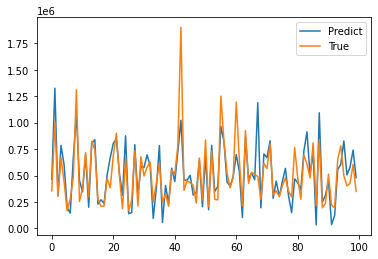

In [162]:
prix_true = df_test_data_prix.reset_index(drop = True)
prix_true = prix_true.values.tolist()
print(prix_true)
print(prix_pre)
plt.plot(prix_pre[1000:1100],label='Predict')
plt.plot(prix_true[1000:1100],label='True')
plt.legend()